## Part 1

In [39]:
import os
import dateparser
import re
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
def get_property_int(property_listing: str, element_type:str, class_name: str):
    property_element = property_listing.find(element_type, {"class": class_name})
    property_text = property_element.text if property_element else ""
    property_number = re.findall(r'\d+', property_text.replace('\xa0', ''))
    return int(''.join(property_number)) if property_number else 0

In [41]:

data = []
folder = "./kungalv_slutpriser/"
flag = True
for filename in os.listdir(folder):
    if filename.endswith(".html"):
        print(filename)
        with open(f"{folder}{filename}", "r") as f:
            soup = BeautifulSoup(f, "html.parser")
            
            property_listings = soup.find_all("div", {"class": "qa-sale-card hcl-grid hcl-grid--columns-1 hcl-grid--md-columns-2"})
            
            for property_listing in property_listings:
                date_of_sale = property_listing.find("span", {"class": "hcl-label hcl-label--state hcl-label--sold-at"}).text.replace("Såld ", "")
                address = property_listing.find("h2", {"class": "sold-property-listing__heading qa-selling-price-title hcl-card__title"}).text
                location = property_listing.find("div", {"class": "sold-property-listing__location"}).div.text
                area_div = property_listing.find("div", {"class": "sold-property-listing__subheading sold-property-listing__area"})
                num_rooms_match = re.search(r'(\d+)\srum', area_div.text)
                num_rooms = int(num_rooms_match.group(1)) if num_rooms_match else 0
                plot_area = get_property_int(property_listing, "div", "sold-property-listing__land-area")
                closing_price = get_property_int(property_listing, "span", "hcl-text hcl-text--medium")

                if flag:
                    flag = False
                    print(area_div)
                boarea = 0
                biarea = 0
                # Handle both formats for area. And if there is no area then set to 0
                if area_div.span:
                    boarea, biarea = area_div.text.replace(',', '.').split("+")
                    boarea = float(boarea)
                    biarea = float(biarea.split()[0])
                elif len(area_div.text.split()) > 0:
                    boarea = float(area_div.text.replace(',', '.').split()[0])

                # Store information in a dictionary and append to list
                data.append({
                    "Date of Sale": dateparser.parse(date_of_sale.strip()),
                    "Address": address.strip(),
                    "Location": ' '.join(location.split()),
                    "Boarea": boarea,
                    "Biarea": biarea,
                    "Total Area": boarea + biarea,
                    "Number of Rooms": num_rooms,
                    "Plot Area": plot_area,
                    "Closing Price": closing_price
                })

# Convert list to DataFrame
df = pd.DataFrame(data)

# Export DataFrame to CSV file
df.to_csv("kungalv_slutpriser.csv", index=False)

kungalv_slutpris_page_03.html
<div class="sold-property-listing__subheading sold-property-listing__area">
                  133
                  <span class="listing-card__attribute--normal-weight">
                    + 119 m²
                  </span>
               
                6 rum
            </div>
kungalv_slutpris_page_20.html
kungalv_slutpris_page_27.html
kungalv_slutpris_page_24.html
kungalv_slutpris_page_26.html
kungalv_slutpris_page_06.html
kungalv_slutpris_page_32.html
kungalv_slutpris_page_01.html
kungalv_slutpris_page_10.html
kungalv_slutpris_page_02.html
kungalv_slutpris_page_17.html
kungalv_slutpris_page_25.html
kungalv_slutpris_page_07.html
kungalv_slutpris_page_04.html
kungalv_slutpris_page_40.html
kungalv_slutpris_page_36.html
kungalv_slutpris_page_38.html
kungalv_slutpris_page_16.html
kungalv_slutpris_page_18.html
kungalv_slutpris_page_11.html
kungalv_slutpris_page_31.html
kungalv_slutpris_page_22.html
kungalv_slutpris_page_14.html
kungalv_slutpris_page_33.htm

## Part 2

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

min     1650000.0
25%     4012500.0
50%     5000000.0
75%     5795000.0
max    10500000.0
Name: Closing Price, dtype: float64


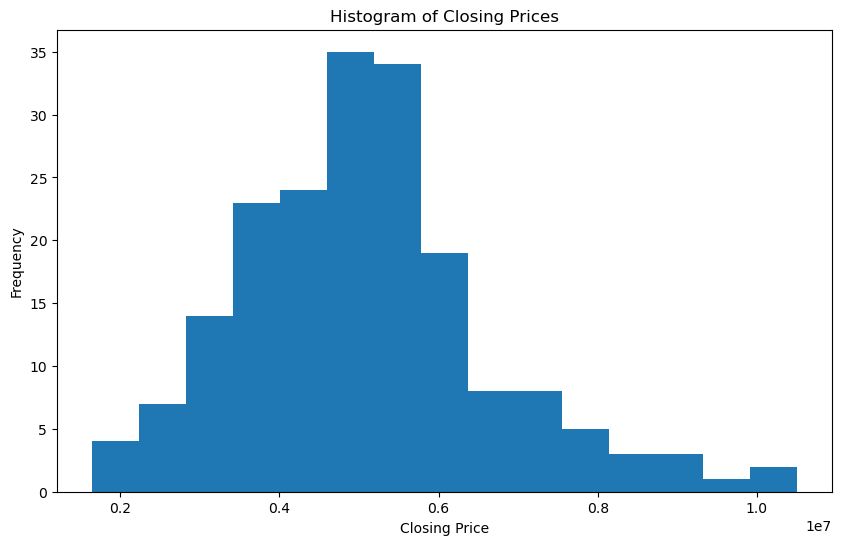

In [43]:
df = pd.read_csv('./kungalv_slutpriser.csv')

df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df_2022 = df[df['Date of Sale'].dt.year == 2022]

summary = df_2022['Closing Price'].describe()
print(summary[['min', '25%', '50%', '75%', 'max']])

plt.figure(figsize=(10,6))
plt.hist(df_2022['Closing Price'], bins='auto')  # 'auto' lets numpy decide the number of bins
plt.title('Histogram of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

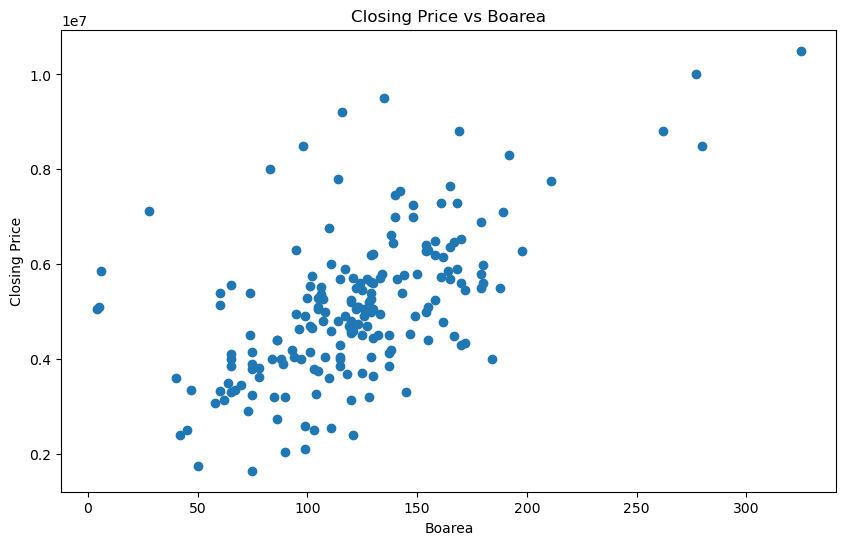

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(df_2022['Boarea'], df_2022['Closing Price'])
plt.title('Closing Price vs Boarea')
plt.xlabel('Boarea')
plt.ylabel('Closing Price')
plt.show()

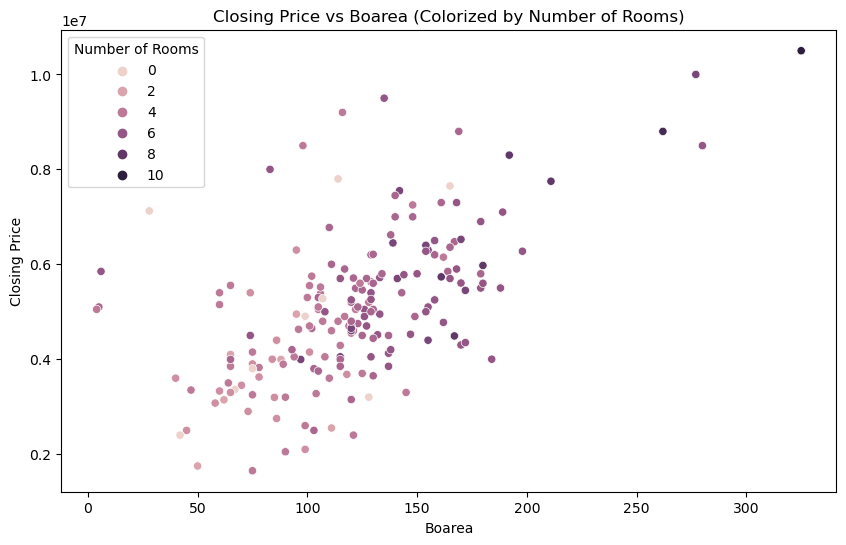

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Boarea', y='Closing Price', hue='Number of Rooms', data=df_2022)
plt.title('Closing Price vs Boarea (Colorized by Number of Rooms)')
plt.show()